In [38]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
%matplotlib inline

img = Image.open('D:\JupyterFile\Lenna.png')

In [92]:
def Gaussian_filter(k,sigma):
    ksize = k * 2 + 1
    kernel = np.zeros([ksize,ksize])#, dtype = np.int)
    for i in range(ksize):
        for j in range(ksize):
            kernel[i,j] = math.exp(-((i-k)**2+(j-k)**2)/(2*sigma**2))
    return kernel

def LoG_filter(k,sigma):
    ksize = k * 2 + 1
    kernel = np.zeros([ksize,ksize])#, dtype = np.int)
    for x in range(ksize):
        for y in range(ksize):
            i = x - k
            j = y - k
            kernel[x,y] = math.exp(-(i**2+j**2)/(2*sigma**2))*((i**2+j**2-2*sigma**2)/sigma**4)
    return kernel

def DoG_filter(k,sigma1,sigma2):
    return Gaussian_filter(k,sigma1)/(2*np.pi*sigma1**2) - Gaussian_filter(k,sigma2)/(2*np.pi*sigma2**2)

In [61]:
#reference
#Digital image processing(4th edition) p521-523
def marr_edgedetec(img,k=1,sigma=1):
    gray = img.convert('L')
    gray = np.array(gray,dtype = np.int32)
    
    Gfilter = Gaussian_filter(k,sigma)
    Gfilter = test/test[0,0]
    Gfilter = np.uint8(test)
    laplace_filter = np.array([[-1,-1,-1],[-1, 8,-1],[-1,-1,-1],])

#Gaussian filter
    bb = np.pad(gray,k,'edge')
    ksize = 2 * k + 1
    sumt = np.sum(Gfilter)
    for i in range(img.size[1]):
        for j in range(img.size[0]):
            gray[i,j] = int(np.sum(bb[i:i + ksize,j:j + ksize] * Gfilter)/sumt)
    
#Laplace operator
    bb = np.pad(gray,1,'edge')
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            gray[i,j] += np.sum(bb[i:i + 3,j:j + 3] * laplace_filter)
    
#Clossing zero
    bb = np.pad(gray,1,'edge')
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            if bb[i,j]*bb[i + 2,j + 2] < 0 or bb[i + 1,j]*bb[i + 1,j + 2] < 0 or bb[i,j + 1]*bb[i + 2,j + 1] < 0 or bb[i + 2,j]*bb[i,j + 2] < 0:
                gray[i,j] = 255
            else:
                gray[i,j] = 0
    return Image.fromarray(np.uint8(gray))

In [74]:
def LoG_edgedetec(img,k=4,sigma=1.6):
    gray = img.convert('L')
    gray = np.array(gray,dtype = np.int32)
    
    LoGfilter = LoG_filter(k,sigma)
    
# Laplacian of the Gaussian(LoG) filter
    bb = np.pad(gray,k,'edge')
    ksize = 2 * k + 1
    sumt = np.sum(LoGfilter)
    for i in range(img.size[1]):
        for j in range(img.size[0]):
            gray[i,j] = int(np.sum(bb[i:i + ksize,j:j + ksize] * LoGfilter)/sumt)

#Threshold    
    thre = np.int32(0.04 * np.max(gray))
    gray = gray + thre
    bb = np.pad(gray,1,'edge')
    
#Clossing zero    
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            if bb[i,j]*bb[i + 2,j + 2] < 0 or bb[i + 1,j]*bb[i + 1,j + 2] < 0 or bb[i,j + 1]*bb[i + 2,j + 1] < 0 or bb[i + 2,j]*bb[i,j + 2] < 0:
                gray[i,j] = 255
            else:
                gray[i,j] = 0    
    return Image.fromarray(np.uint8(gray))

In [105]:
def DoG_edgedetec(img,k=1,sigma1=0.3,sigma2=0.5):
    gray = img.convert('L')
    gray = np.array(gray,dtype = np.float64)
    
    DoGfilter = DoG_filter(k,sigma1,sigma2)
    
# Difference of Gaussian(DoG) filter
    bb = np.pad(gray,k,'edge')
    ksize = 2 * k + 1
    sumt = np.sum(DoGfilter)
    for i in range(img.size[1]):
        for j in range(img.size[0]):
            gray[i,j] = int(np.sum(bb[i:i + ksize,j:j + ksize] * DoGfilter)/sumt)

#Threshold    
#     thre = np.int32(0.04 * np.max(gray))
#     gray = gray + thre
#     bb = np.pad(gray,1,'edge')
    
#Clossing zero    
#     for i in range(img.size[0]):
#         for j in range(img.size[1]):
#             if bb[i,j]*bb[i + 2,j + 2] < 0 or bb[i + 1,j]*bb[i + 1,j + 2] < 0 or bb[i,j + 1]*bb[i + 2,j + 1] < 0 or bb[i + 2,j]*bb[i,j + 2] < 0:
#                 gray[i,j] = 255
#             else:
#                 gray[i,j] = 0    
#     return Image.fromarray(np.uint8(gray))
    return gray

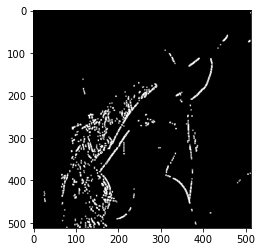

In [76]:
plt.imshow(marr_edgedetec(img),'gray')

In [102]:
test = DoG_filter(1,0.3,0.5)
test/test[0,0]

array([[  1.        ,   6.8181991 ,   1.        ],
       [  6.8181991 , -97.28388469,   6.8181991 ],
       [  1.        ,   6.8181991 ,   1.        ]])

In [94]:
plt.imshow(LoG_edgedetec(img),'gray')

array([[-7.16421173e-08, -2.89024914e-05, -2.13561747e-04,
        -2.89024914e-05, -7.16421173e-08],
       [-2.89024914e-05, -1.16336687e-02, -7.93206694e-02,
        -1.16336687e-02, -2.89024914e-05],
       [-2.13561747e-04, -7.93206694e-02,  1.13176848e+00,
        -7.93206694e-02, -2.13561747e-04],
       [-2.89024914e-05, -1.16336687e-02, -7.93206694e-02,
        -1.16336687e-02, -2.89024914e-05],
       [-7.16421173e-08, -2.89024914e-05, -2.13561747e-04,
        -2.89024914e-05, -7.16421173e-08]])

In [91]:
Gaussian_filter(2,0.9)

array([[0.00716698, 0.04566515, 0.08465799, 0.04566515, 0.00716698],
       [0.04566515, 0.29096046, 0.53940751, 0.29096046, 0.04566515],
       [0.08465799, 0.53940751, 1.        , 0.53940751, 0.08465799],
       [0.04566515, 0.29096046, 0.53940751, 0.29096046, 0.04566515],
       [0.00716698, 0.04566515, 0.08465799, 0.04566515, 0.00716698]])

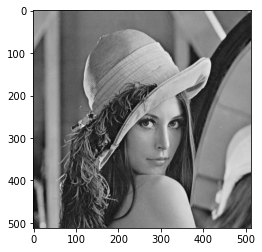

In [96]:
plt.imshow(DoG_edgedetec(img),'gray')

In [107]:
test = DoG_edgedetec(img)

In [108]:
n = 0
for i in range(img.size[0]):
    for j in range(img.size[1]):
        if test[i,j] < 0:
            n += 1
n

0